$$U_{rr} + \frac{1}{r}U_r + \frac{1}{r²}U_{\theta \theta} = 0$$

$$U(1,\theta) = 100, \theta \in [0,\pi]$$
$$U(r,0) = U(r,\pi) = 0,  r \in [0,1]$$

In [2]:
using LinearAlgebra
using Plots

In [53]:
function eliptica_jacobi(fa, fb, fc, fd, a, b, c, d, nx,ny,f, maxiter, tol)
    
    r = LinRange(a, b, nx+1)
    θ = LinRange(c, d, ny+1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = zeros(ny+1, nx+1)

    U[1, :] = map(fa, r)
    U[end, :] = map(fb, r)
    U[:, 1] = map(fc, θ)
    U[:, end] = map(fd, θ)
    # U[1,end] = 50
    # U[end,end] = 50
    
    iter = 1
    error = tol + 1
    V = copy(U)

    while iter < maxiter && error > tol
        for j in 2:ny
            for i in 2:nx
                V[j,i] = 1/(2*(1 + (h/(k*r[i]))^2 ))*( (1-h/(2*r[i]))*U[j,i-1] + (1 + h/(2*r[i]))*U[j,i+1] + (h/(k*r[i]))^2*( U[j-1,i]) + U[j+1,i] )
            end
        end
        error = maximum(abs.(U .- V))
        U = copy(V)
        iter += 1
    end
    
    return r,θ,U, iter, error
end

eliptica_jacobi (generic function with 1 method)

In [51]:
# Define the functions
fa(r) = 0.0
fb(r) = 0.0
fc(θ) = 0.0
fd(θ) = 100
f(r,θ) = 0.0

# Define parameters
a = 0
b = 1
c = 0
d = π
nx = 6
ny = 6

maxiter = 100000
tol = 1e-4

# Call the eliptica_jacobi function
r,θ,U, iter, error = eliptica_jacobi(fa, fb, fc, fd, a, b, c, d, nx,ny, f, maxiter, tol)
display(U)
println("Number of iterations: $iter")
println("Error: $error")

7×7 Matrix{Float64}:
 0.0    0.0       0.0       0.0       0.0       0.0    100.0
 0.0  253.907  1306.18   2562.42   2948.7    1973.78   100.0
 0.0  400.831  1601.09   2673.21   2779.23   1759.69   100.0
 0.0  397.992  1288.99   1898.07   1834.7    1133.58   100.0
 0.0  303.839   797.731  1036.6     936.236   579.984  100.0
 0.0  175.922   351.299   387.124   321.577   211.205  100.0
 0.0    0.0       0.0       0.0       0.0       0.0    100.0

Number of iterations: 1238
Error: 9.940022937371396e-5


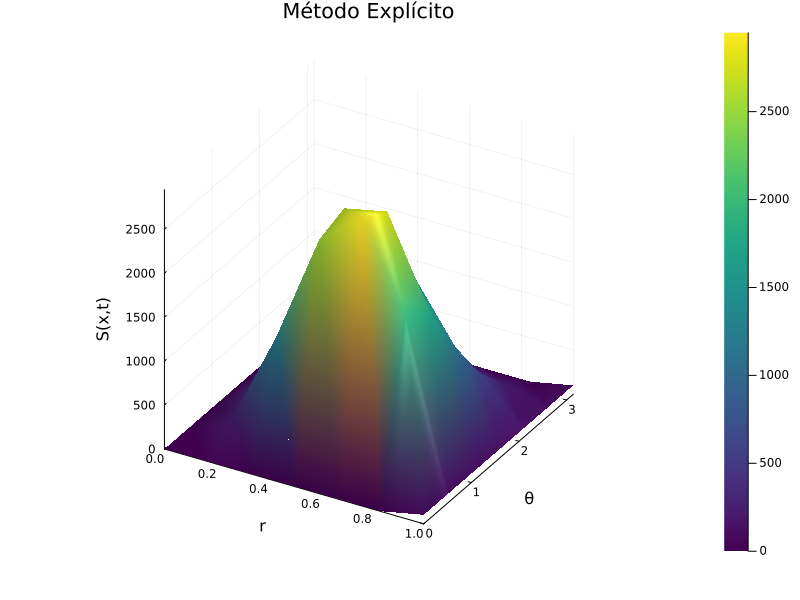

In [54]:
surface(r,θ, U, 
        size=(800,600), 
        c=:viridis, 
        title="Método Explícito",
        xlabel="r",
        ylabel="θ",
        zlabel="S(x,t)")